# Setup

Import required libraries

In [1]:
%load_ext autoreload
%autoreload 2

# External imports
from pathlib import Path
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from constants import colors as c, column_names as cn
from features import calculate_technical_indicators
from utils import print_in_columns, print_scores

# Load data

Load data by referencing the last file in the processed data folder

In [2]:
# Get filename of last file in data/processed folder
files = list(Path("../data/processed").glob("*.csv"))
files.sort()
filename = files[-1]

# Read file into a DataFrame
df = pd.read_csv(
    Path(filename).absolute(),
    delimiter=",",
    index_col=cn.DATETIME,
    parse_dates=True,
)

# Explore and visualize data

Cast datetime index column to datetime type

In [3]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

Create various features by applying functions from the technical analysis library

In [4]:
df = calculate_technical_indicators(df)

Review data statistics

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Bollinger Bands: Upper,Bollinger Bands: Middle,Bollinger Bands: Lower,Exponential Moving Average: 6 period,Exponential Moving Average: 9 periods,Exponential Moving Average: 12 periods,Moving Average Convergence Divergence,Moving Average Convergence Divergence: Signal,Moving Average Convergence Divergence: Histogram,Relative Strength Index
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,58142.237895,58169.804912,58120.687719,58144.816842,0.836633,58203.606214,58131.036772,58058.467330,58137.201083,58132.666948,58128.181114,10.506218,10.419788,0.086430,52.676804
std,846.209163,838.520372,848.765585,843.153981,1.559105,845.382716,854.987502,867.552213,849.071910,852.444087,855.536248,39.581497,37.642322,10.182399,18.658416
min,54975.000000,54984.000000,54929.000000,54955.000000,0.000086,55021.738437,54991.800000,54868.707140,54988.170102,54997.756501,55009.449572,-90.792119,-76.635443,-36.249251,4.245459
25%,57479.000000,57498.000000,57462.000000,57475.000000,0.106850,57526.356821,57471.600000,57421.095566,57473.768912,57466.077805,57466.176345,-14.365228,-14.054144,-5.907367,39.300502
50%,58419.000000,58439.000000,58399.000000,58419.000000,0.326562,58472.163308,58409.600000,58347.740117,58409.983587,58407.453517,58400.341709,5.004249,5.571969,0.224121,52.907381
75%,58661.000000,58679.000000,58648.000000,58665.000000,0.901520,58716.774036,58652.400000,58596.253902,58657.416544,58655.505316,58654.035663,25.891187,25.702328,5.427181,65.544410
max,59909.000000,60000.000000,59877.000000,59921.000000,20.289811,59957.613842,59826.200000,59744.592513,59808.943539,59784.194403,59775.755497,210.209990,177.918416,58.562941,96.068777


Visualize data to understand trends and patterns

<Figure size 2100x900 with 0 Axes>

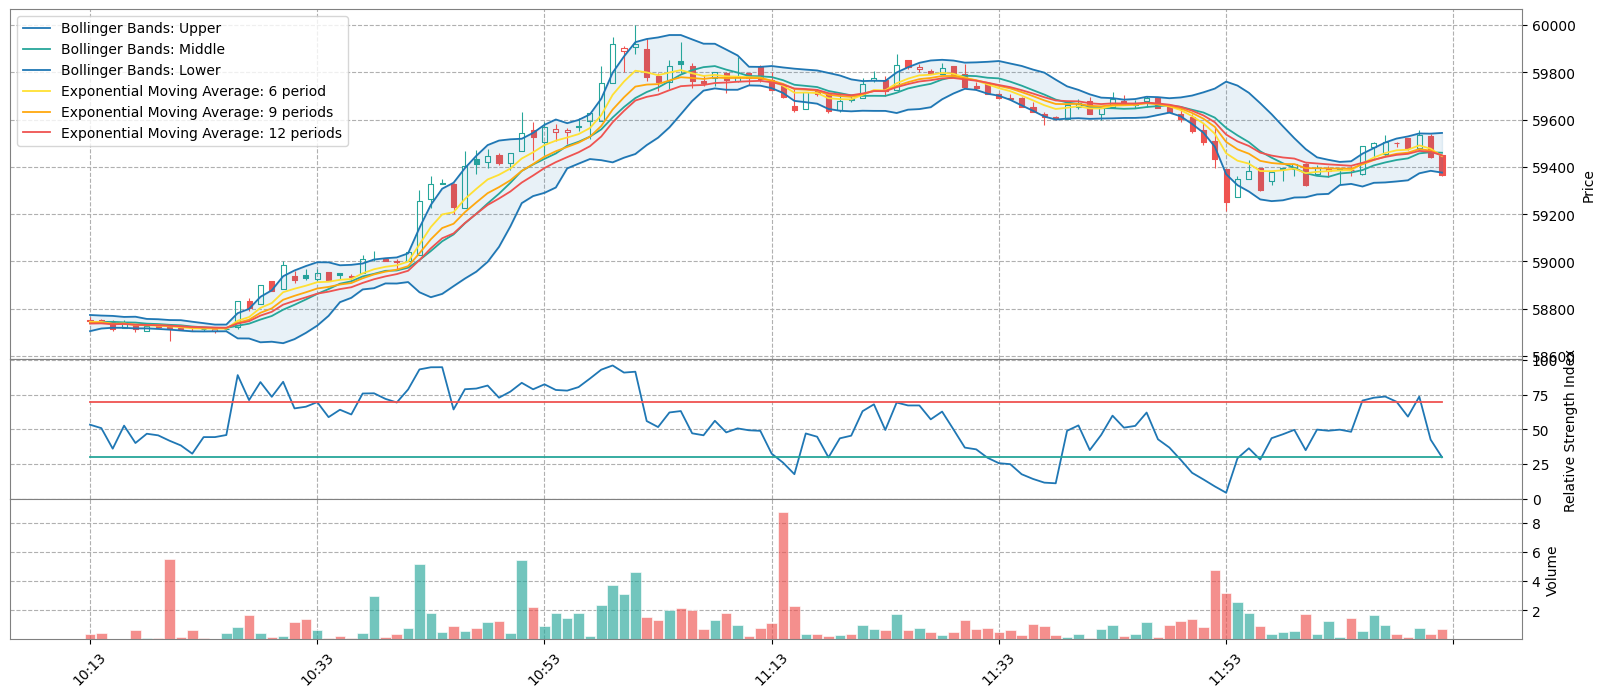

In [6]:
# Filter out last two hours
last_hour = df.iloc[-120:, :]

plt.figure(figsize=(21, 9))

indicators = [
    # Bollinger Bands
    mpf.make_addplot(
        last_hour[cn.BBANDS_UPPER],
        color=c.HONOLULU_BLUE,
        label=cn.BBANDS_UPPER,
        panel=0,
    ),
    mpf.make_addplot(
        last_hour[cn.BBANDS_MIDDLE],
        color=c.PERSIAN_GREEN,
        label=cn.BBANDS_MIDDLE,
        panel=0,
    ),
    mpf.make_addplot(
        last_hour[cn.BBANDS_LOWER],
        color=c.HONOLULU_BLUE,
        label=cn.BBANDS_LOWER,
        panel=0,
    ),
    # Moving Average Convergence Divergence
    mpf.make_addplot(
        last_hour[cn.EMA_6],
        color=c.BRIGHT_YELLOW,
        label=cn.EMA_6,
        panel=0,
    ),
    mpf.make_addplot(
        last_hour[cn.EMA_9],
        color=c.YELLOW_SEA,
        label=cn.EMA_9,
        panel=0,
    ),
    mpf.make_addplot(
        last_hour[cn.EMA_12],
        color=c.IMPERIAL_RED,
        label=cn.EMA_12,
        panel=0,
    ),
    # Relative Strength Index
    mpf.make_addplot(
        last_hour[cn.RSI],
        panel=1,
        ylabel=cn.RSI,
    ),
    mpf.make_addplot(
        [70 for i in range(len(last_hour))],
        color=c.IMPERIAL_RED,
        panel=1,
        secondary_y=False,
    ),
    mpf.make_addplot(
        [30 for i in range(len(last_hour))],
        color=c.PERSIAN_GREEN,
        panel=1,
        secondary_y=False,
    ),
]

mpf.plot(
    last_hour,
    addplot=indicators,
    figsize=(21, 9),
    fill_between=dict(
        alpha=0.1,
        color=c.HONOLULU_BLUE,
        y1=last_hour[cn.BBANDS_LOWER].values,
        y2=last_hour[cn.BBANDS_UPPER].values,
    ),
    style="tradingview",
    type="hollow_and_filled",
    volume=True,
    volume_panel=2,
)

# Prepare data

Split data into training and testing datasets

In [7]:
from sklearn.model_selection import train_test_split

# Filter out predictor columns and reshape to 1D array
X = df[
    [
        cn.BBANDS_UPPER,
        cn.BBANDS_MIDDLE,
        cn.BBANDS_LOWER,
        cn.EMA_6,
        cn.EMA_9,
        cn.EMA_12,
        cn.MACD,
        cn.MACD_SIGNAL,
        cn.MACD_HISTOGRAM,
        cn.RSI,
    ]
]

# Filter out target column
y = df[cn.CLOSE]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=120, random_state=42, shuffle=False
)

Create pipeline to preprocess data

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

preprocessor = make_pipeline(StandardScaler())

# Train and select model

Train various models and evaluate their performance in order to select a model

## AdaBoost Regressor

In [9]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_regressor = make_pipeline(
    preprocessor,
    AdaBoostRegressor(random_state=42),
)
ada_boost_regressor.fit(X_train, y_train)
ada_boost_predictions = ada_boost_regressor.predict(X_test)

print_scores(
    ada_boost_regressor.score(X_train, y_train),
    ada_boost_regressor.score(X_test, y_test),
)

Train score:      99.53%
Test score:     -233.59%


## Gradient Boost Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_regressor = make_pipeline(
    preprocessor,
    GradientBoostingRegressor(random_state=42),
)
gradient_boosting_regressor.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_regressor.predict(X_test)

print_scores(
    gradient_boosting_regressor.score(X_train, y_train),
    gradient_boosting_regressor.score(X_test, y_test),
)

Train score:      99.98%
Test score:     -195.85%


## Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=42),
)
random_forest_regressor.fit(X_train, y_train)
random_forest_predictions = random_forest_regressor.predict(X_test)

print_scores(
    random_forest_regressor.score(X_train, y_train),
    random_forest_regressor.score(X_test, y_test),
)

Train score:      99.99%
Test score:     -205.52%


## XGBoost Regressor

In [12]:
from xgboost import XGBRegressor

x_g_boost_regressor = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=42),
)
x_g_boost_regressor.fit(X_train, y_train)
x_g_boost_predictions = x_g_boost_regressor.predict(X_test)

print_scores(
    x_g_boost_regressor.score(X_train, y_train),
    x_g_boost_regressor.score(X_test, y_test),
)

Train score:     100.00%
Test score:     -208.08%


Calculate multiple loss function scores to evaluate each model performance

In [13]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)

scores = pd.DataFrame(
    {
        "MAE": [
            round(mean_absolute_error(y_test, ada_boost_predictions), 4),
            round(mean_absolute_error(y_test, gradient_boosting_predictions), 4),
            round(mean_absolute_error(y_test, random_forest_predictions), 4),
            round(mean_absolute_error(y_test, x_g_boost_predictions), 4),
        ],
        "MSE": [
            round(mean_squared_error(y_test, ada_boost_predictions), 4),
            round(mean_squared_error(y_test, gradient_boosting_predictions), 4),
            round(mean_squared_error(y_test, random_forest_predictions), 4),
            round(mean_squared_error(y_test, x_g_boost_predictions), 4),
        ],
        "RMSE": [
            round(np.sqrt(mean_squared_error(y_test, ada_boost_predictions)), 4),
            round(
                np.sqrt(mean_squared_error(y_test, gradient_boosting_predictions)), 4
            ),
            round(np.sqrt(mean_squared_error(y_test, random_forest_predictions)), 4),
            round(np.sqrt(mean_squared_error(y_test, x_g_boost_predictions)), 4),
        ],
        "MAPE": [
            round(mean_absolute_percentage_error(y_test, ada_boost_predictions), 4),
            round(
                mean_absolute_percentage_error(y_test, gradient_boosting_predictions), 4
            ),
            round(mean_absolute_percentage_error(y_test, random_forest_predictions), 4),
            round(mean_absolute_percentage_error(y_test, x_g_boost_predictions), 4),
        ],
        "R2": [
            round(r2_score(y_test, ada_boost_predictions), 4),
            round(r2_score(y_test, gradient_boosting_predictions), 4),
            round(r2_score(y_test, random_forest_predictions), 4),
            round(r2_score(y_test, x_g_boost_predictions), 4),
        ],
    },
    index=[
        "AdaBoost Regressor",
        "Gradient Boosting Regressor",
        "Random Forest Regressor",
        "XGBoost Regressor",
    ],
)

scores

,MAE,MSE,RMSE,MAPE,R2
AdaBoost Regressor,576.7958,438554.3606,662.2344,0.0097,-2.3359
Gradient Boosting Regressor,528.1582,388936.1326,623.6474,0.0089,-1.9585
Random Forest Regressor,541.0187,401656.3954,633.7637,0.0091,-2.0552
XGBoost Regressor,541.5441,405022.5470,636.4138,0.0091,-2.0808


# Fine-tune model

Fine-tune the selected model by tuning hyperparameters

In [22]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "gradientboostingregressor__n_estimators": [100, 200, 300],
#     'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.2],
#     'gradientboostingregressor__max_depth': [3, 4, 5],
#     'gradientboostingregressor__min_samples_split': [2, 5, 10],
#     'gradientboostingregressor__min_samples_leaf': [1, 2, 4],
#     'gradientboostingregressor__max_features': ['auto', 'sqrt', 'log2']
# }

param_grid = {
    "gradientboostingregressor__learning_rate": [0.2],
    "gradientboostingregressor__max_depth": [5],
    "gradientboostingregressor__max_features": ["sqrt"],
    "gradientboostingregressor__min_samples_leaf": [4],
    "gradientboostingregressor__min_samples_split": [2],
    "gradientboostingregressor__n_estimators": [300],
}

grid_search = GridSearchCV(
    gradient_boosting_regressor,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring="r2",
    verbose=3,
)
grid_search.fit(
    X_train,
    y_train,
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__max_depth=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__min_samples_leaf=4, gradientboostingregressor__min_samples_split=2, gradientboostingregressor__n_estimators=300;, score=0.973 total time=   0.5s
[CV 1/5] END gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__max_depth=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__min_samples_leaf=4, gradientboostingregressor__min_samples_split=2, gradientboostingregressor__n_estimators=300;, score=-0.338 total time=   0.5s
[CV 3/5] END gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__max_depth=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__min_samples_leaf=4, gradientboostingregressor__min_samples_split=2, gradientboostingregressor__n_estimators=300;, score=0.954 total ti

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.2],
                         'gradientboostingregressor__max_depth': [5],
                         'gradientboostingregressor__max_features': ['sqrt'],
                         'gradientboostingregressor__min_samples_leaf': [4],
                         'gradientboostingregressor__min_samples_split': [2],
                         'gradientboostingregressor__n_estimators': [300]},
             scoring='r2', verbose=3)

Define model by using the best hyperparameters

In [15]:
model = grid_search.best_estimator_

# Display the best parameters
grid_search.best_params_

{'gradientboostingregressor__learning_rate': 0.2,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__max_features': 'sqrt',
 'gradientboostingregressor__min_samples_leaf': 4,
 'gradientboostingregressor__min_samples_split': 2,
 'gradientboostingregressor__n_estimators': 300}

Evaluate fine-tuned model performance on test set

In [16]:
predictions = model.predict(X_test)
column_width = 32

print_in_columns(
    "Mean Absolute Error:",
    round(mean_absolute_error(y_test, predictions), 4),
    column_width,
)
print_in_columns(
    "Mean Squared Error:",
    round(mean_squared_error(y_test, predictions), 4),
    column_width,
)
print_in_columns(
    "Root Mean Squared Error:",
    round(np.sqrt(mean_squared_error(y_test, predictions)), 4),
    column_width,
)
print_in_columns(
    "Mean Absolute Percentage Error:",
    round(mean_absolute_percentage_error(y_test, predictions), 4),
    column_width,
)
print_in_columns(
    "R2 Score",
    round(r2_score(y_test, predictions), 4),
    column_width,
)

Mean Absolute Error:                                    519.9749
Mean Squared Error:                                  376603.5331
Root Mean Squared Error:                                613.6803
Mean Absolute Percentage Error:                           0.0087
R2 Score                                                 -1.8646


Plot actual and predicted values on top of each other

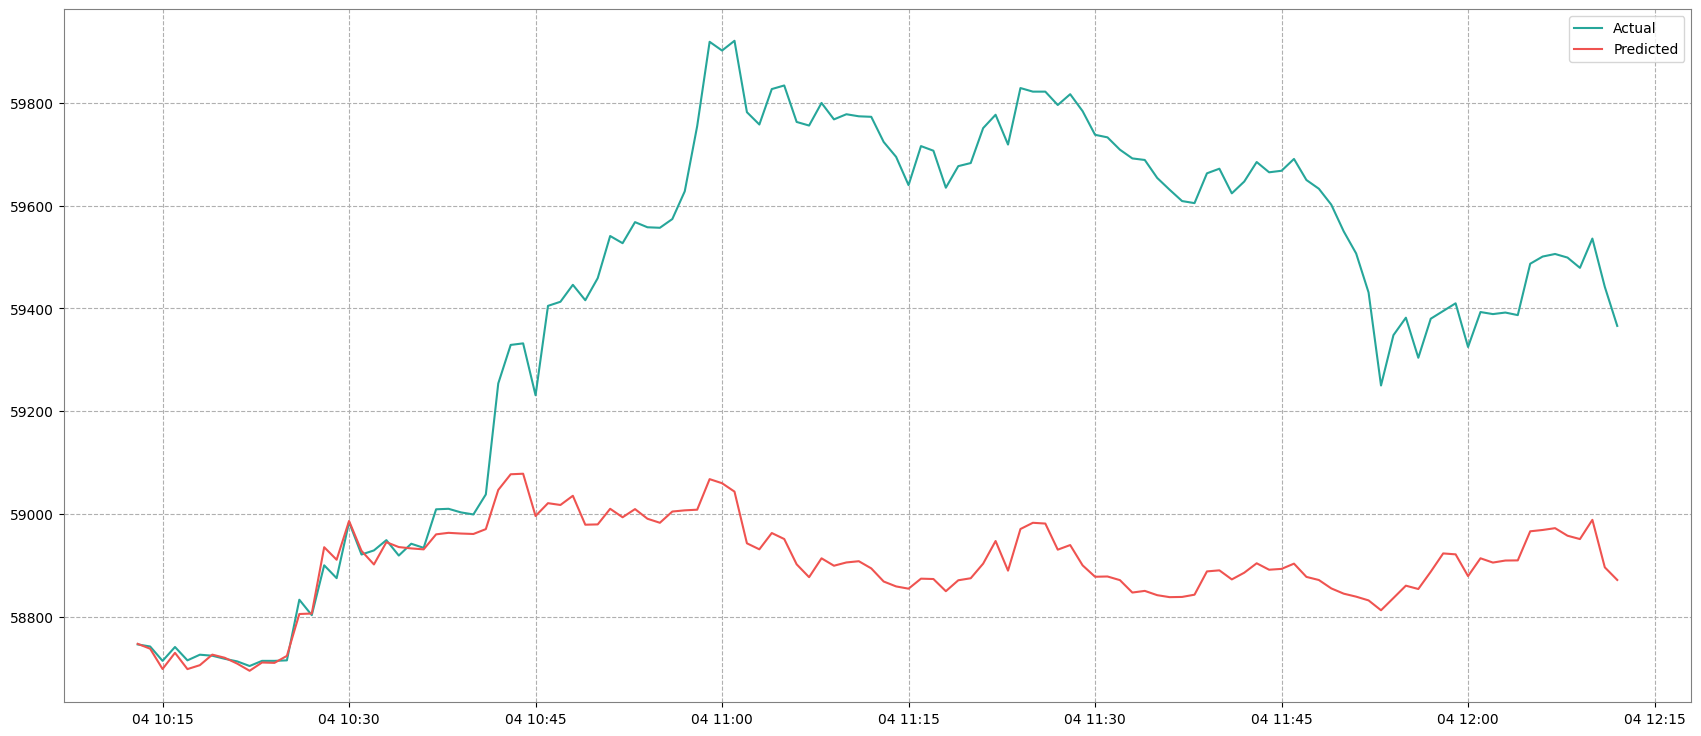

In [17]:
predictions = pd.Series(predictions, index=y_test.index)

plt.figure(figsize=(21, 9))
plt.plot(y_test, label="Actual", color=c.PERSIAN_GREEN)
plt.plot(predictions, label="Predicted", color=c.IMPERIAL_RED)
plt.legend()

plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Define list of technical indicators to forecast
indicators = [
    cn.BBANDS_UPPER,
    cn.BBANDS_MIDDLE,
    cn.BBANDS_LOWER,
    cn.EMA_6,
    cn.EMA_9,
    cn.EMA_12,
    cn.MACD,
    cn.MACD_SIGNAL,
    cn.MACD_HISTOGRAM,
    cn.RSI,
]

# Create a datetime range to iterate over
time_range = pd.date_range(start=df.index[-1], periods=61, freq="min")[1:]

# Create recursions DataFrame based on original, excluding unnecessary columns
recursions = df.drop(columns=[cn.HIGH, cn.LOW, cn.OPEN, cn.VOLUME])

# Iterate over each time step and recursively predict next closing price
for time_step in time_range:

    # --------------------------------------------------------------------------
    # Step 1: Forecast the next value for each indicator
    # --------------------------------------------------------------------------

    # Create DataFrame to store forecasted indicators
    predictors = pd.DataFrame()

    # Iterate over each indicator
    for indicator in indicators:
        # Apply ARIMA model to forecast next value for each indicator
        projection = (
            ARIMA(
                recursions[indicator].values,
                order=(1, 1, 1),
            )
            .fit()
            .forecast(steps=1)[0]
        )
        # Store projections per indicator
        predictors[indicator] = [projection]

    # --------------------------------------------------------------------------
    # Step 2: Predict the next closing price based on forecasted indicators
    # --------------------------------------------------------------------------

    # Define variable to store the next closing price
    next_closing_price = np.round(model.predict(predictors))

    # --------------------------------------------------------------------------
    # Step 3: Calculate technical indicators based on predicted closing price
    # --------------------------------------------------------------------------

    # Append next closing price to original closing prices
    all_closing_prices = pd.DataFrame(
        {
            cn.CLOSE: pd.concat(
                [
                    recursions[cn.CLOSE],
                    pd.Series(next_closing_price, index=[time_step]),
                ]
            )
        }
    )

    # Calculate indicators based on predicted and original closing prices
    calculated_indicators = calculate_technical_indicators(all_closing_prices)

    # --------------------------------------------------------------------------
    # Step 4: Append closing price and technical indicators to recursions
    # --------------------------------------------------------------------------

    # Get last row of calculated indicators
    row = calculated_indicators[-1:]

    # Append row to recursions
    recursions = pd.concat([recursions, row])

In [19]:
recursions.describe()

,Close,Bollinger Bands: Upper,Bollinger Bands: Middle,Bollinger Bands: Lower,Exponential Moving Average: 6 period,Exponential Moving Average: 9 periods,Exponential Moving Average: 12 periods,Moving Average Convergence Divergence,Moving Average Convergence Divergence: Signal,Moving Average Convergence Divergence: Histogram,Relative Strength Index
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,58169.484175,58233.452223,58159.092189,58084.732154,58163.726630,58160.258013,58156.799419,8.076450,8.058733,0.017717,51.433694
std,835.062303,842.873430,849.397156,859.735233,842.247300,846.381696,850.236046,42.001727,39.794732,11.029744,19.919779
min,54955.000000,55021.738437,54991.800000,54868.707140,54988.170102,54997.756501,55009.449572,-184.359247,-161.891354,-77.699795,0.201451
25%,57486.000000,57532.370653,57485.400000,57432.550695,57482.733199,57481.455671,57479.429890,-16.364587,-15.769452,-5.926059,37.777456
50%,58442.000000,58495.158195,58452.900000,58395.057303,58453.991626,58458.542025,58460.400920,3.748624,4.333368,0.187360,52.205503
75%,58679.000000,58730.440763,58676.000000,58612.925052,58676.867168,58671.567698,58670.936489,25.500279,24.773788,5.444187,65.131086
max,59921.000000,59957.613842,59826.200000,59744.592513,59808.943539,59784.194403,59775.755497,210.209990,177.918416,58.562941,96.068777


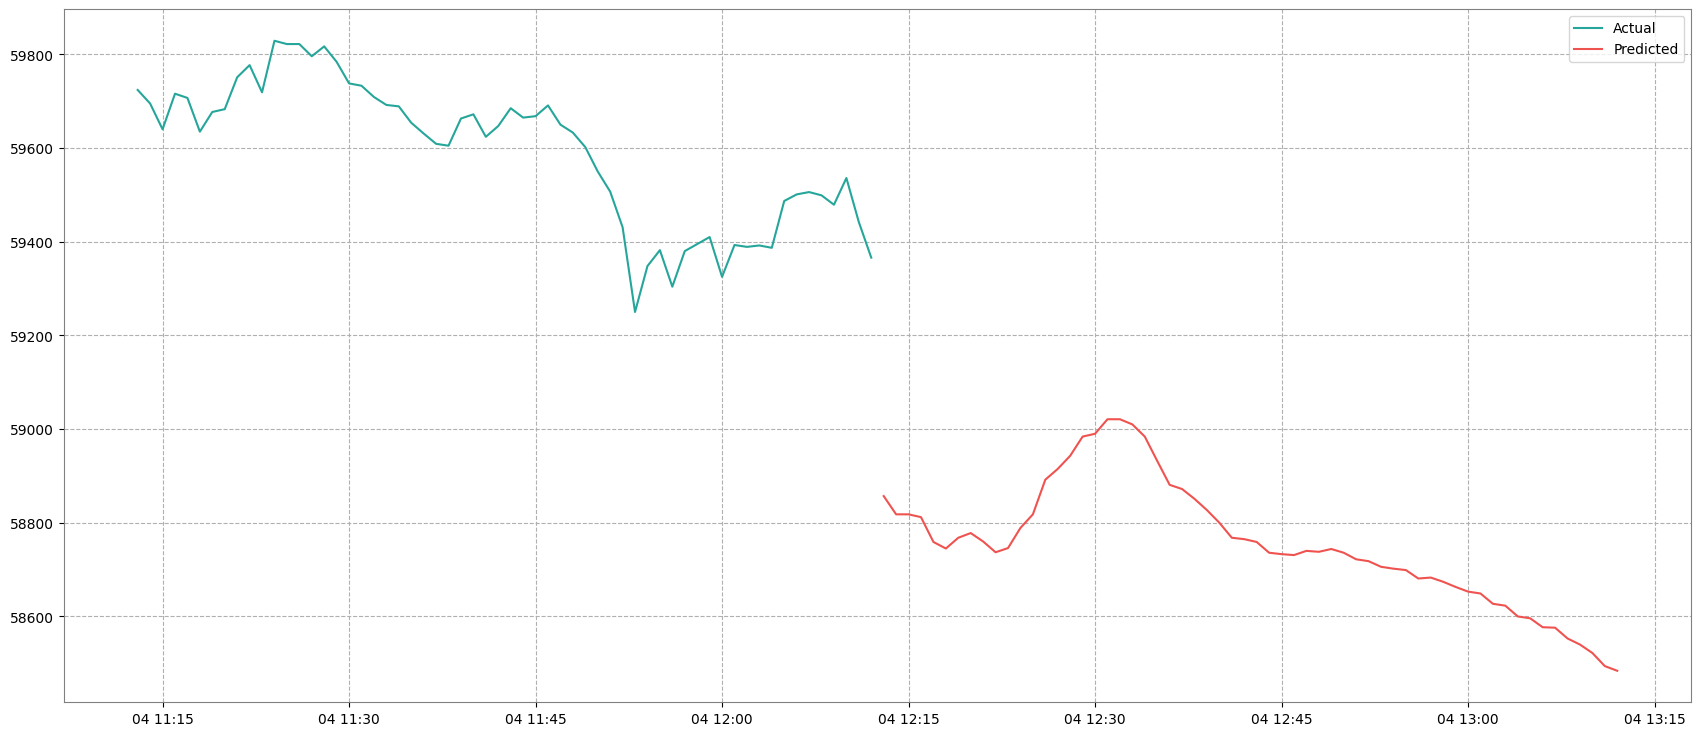

In [20]:
steps = len(time_range)
actual = recursions[-(steps * 2) : -steps]
predicted = recursions[-steps:]

plt.figure(figsize=(21, 9))
plt.plot(actual[cn.CLOSE], label="Actual", color=c.PERSIAN_GREEN)
plt.plot(predicted[cn.CLOSE], label="Predicted", color=c.IMPERIAL_RED)
plt.legend()

plt.show()

In [97]:
from time import time


def get_minute_timestamp(timestamp: float = None) -> int:
    if timestamp == None:
        timestamp = time()

    return ((int(timestamp) // 60) + 1) * 60 * 1000


# print(get_minute_timestamp())

test = range(1, 10)

test

range(1, 10)